In [ ]:
#Importing Basic Packages

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from tqdm import tqdm # progress slider for ``for'' loops

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading data from Drive
# file_url = "https://raw.githubusercontent.com/joopark01/projects/main/BreastCancer.csv"
# pd.read.csv(file_url)
bc = pd.read_csv("/content/drive/MyDrive/BA305Project/BreastCancer.csv")
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data Cleaning

In [ ]:
#Dropping unnecessary columns

bc.columns = [x.replace(' ', '') for x in bc.columns]

bc = bc.drop("Unnamed:32", axis = 1)
bc = bc.drop(["id", "radius_se","texture_se","perimeter_se", "area_se", "smoothness_se", "compactness_se","concavity_se","concavepoints_se",
                        "symmetry_se", "fractal_dimension_se"], axis = 1)

# #Need this for later in Neural Networks
# df1= pd.get_dummies(bc, columns=['diagnosis'], drop_first=True)

# bc.head()


In [ ]:
#Checking for any null values
bc.isnull().values.any()

False

In [ ]:
#Changing Malignant and Benign diagnosis into 1 and 0 respectively for dummy coding
bc = bc.replace({"M":1, "B":0})
bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concavepoints_mean       569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_worst             569 non-null    float64
 12  texture_worst            569 non-null    float64
 13  perimeter_worst          569 non-null    float64
 14  area_worst               5

## Data Visualization

diagnosis
0    357
1    212
Name: count, dtype: int64


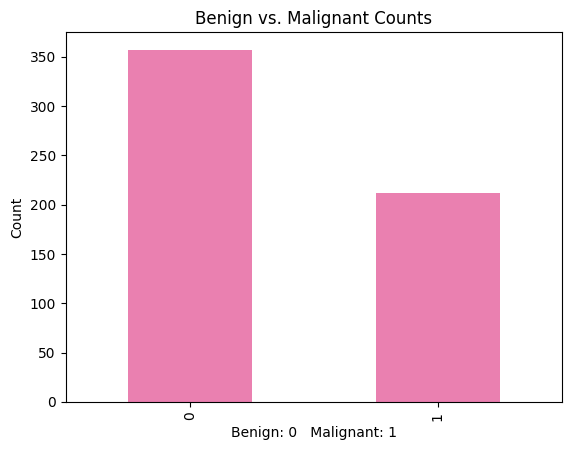

In [ ]:
#Running some visualizations to get a better understanding of what the data looks like

value_counts = bc['diagnosis'].value_counts()
ax = value_counts.plot.bar(color = "#EA80B0")
ax.set_xlabel('Benign: 0   Malignant: 1')
ax.set_ylabel('Count')
ax.set_title('Benign vs. Malignant Counts')
print(value_counts)

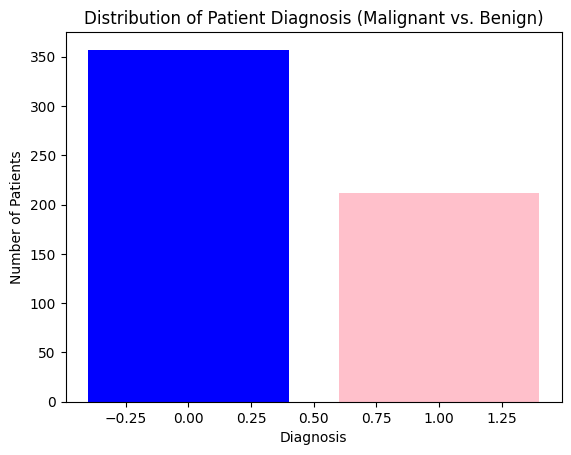

In [ ]:
#Visualization of counts in each class
class_counts = bc["diagnosis"].value_counts()
plt.bar(class_counts.index, class_counts.values, color = ['blue','pink'])

plt.title("Distribution of Patient Diagnosis (Malignant vs. Benign)")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Patients")

plt.show()

In [ ]:
class_counts

diagnosis
0    357
1    212
Name: count, dtype: int64

The median area mean is 932.0
The median area mean is 458.4


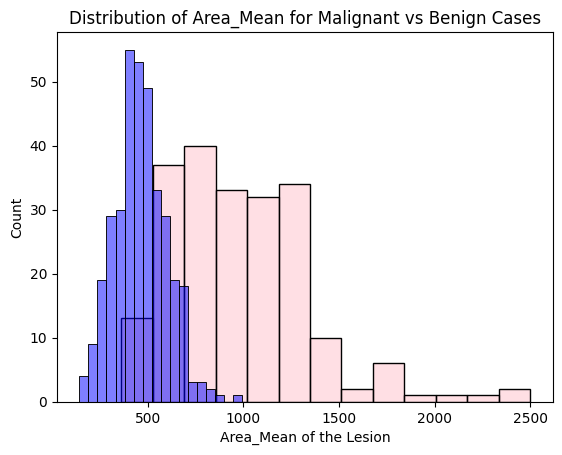

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Two separate dataframes for malignant and benign cases for _mean
df_malignant = bc[bc['diagnosis'] == 1]
df_benign = bc[bc['diagnosis'] == 0]

sns.histplot(df_malignant['area_mean'], color='pink', alpha=0.5, label='Malignant')
sns.histplot(df_benign['area_mean'], color='blue', alpha=0.5, label='Benign')

plt.title('Distribution of Area_Mean for Malignant vs Benign Cases')
plt.xlabel('Area_Mean of the Lesion')
plt.ylabel('Count')
plt.plot()

print("The median area mean is", df_malignant['area_mean'].median())
print("The median area mean is", df_benign['area_mean'].median())

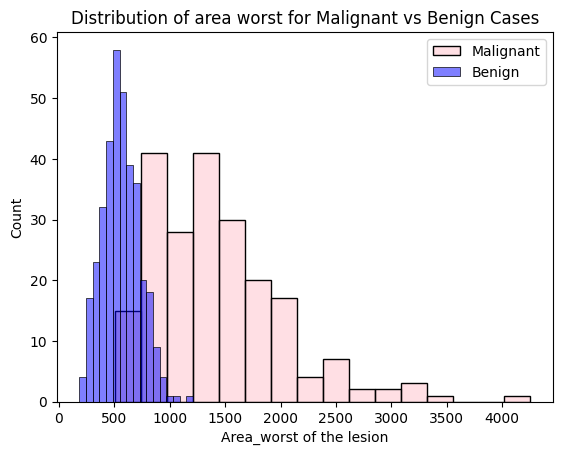

The median area worst is 1303.0
The median area worst is 547.4


In [ ]:
#Two separate dataframes for malignant and benign cases for _worst
sns.histplot(df_malignant['area_worst'], color='pink', alpha=0.5, label='Malignant')
sns.histplot(df_benign['area_worst'], color='blue', alpha=0.5, label='Benign')

plt.title('Distribution of area worst for Malignant vs Benign Cases')
plt.xlabel('Area_worst of the lesion')
plt.ylabel('Count')
plt.legend()

plt.show()

print("The median area worst is", df_malignant['area_worst'].median())
print("The median area worst is", df_benign['area_worst'].median())

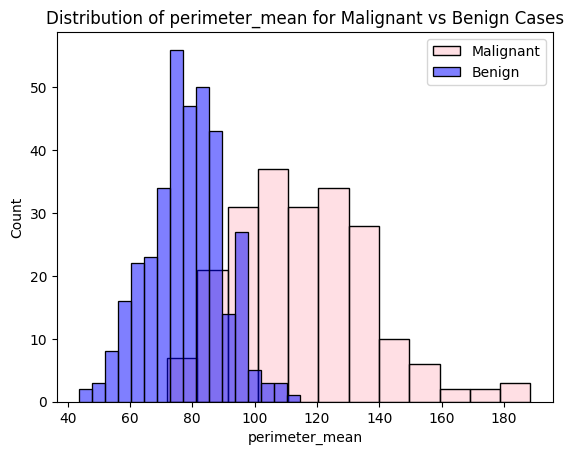

The median perimeter_mean is 114.2
The median perimeter_mean is 78.18


In [ ]:
sns.histplot(df_malignant['perimeter_mean'], color='pink', alpha=0.5, label='Malignant')
sns.histplot(df_benign['perimeter_mean'], color='blue', alpha=0.5, label='Benign')

plt.title('Distribution of perimeter_mean for Malignant vs Benign Cases')
plt.xlabel('perimeter_mean')
plt.ylabel('Count')
plt.legend()

plt.show()

print("The median perimeter_mean is", df_malignant['perimeter_mean'].median())
print("The median perimeter_mean is", df_benign['perimeter_mean'].median())

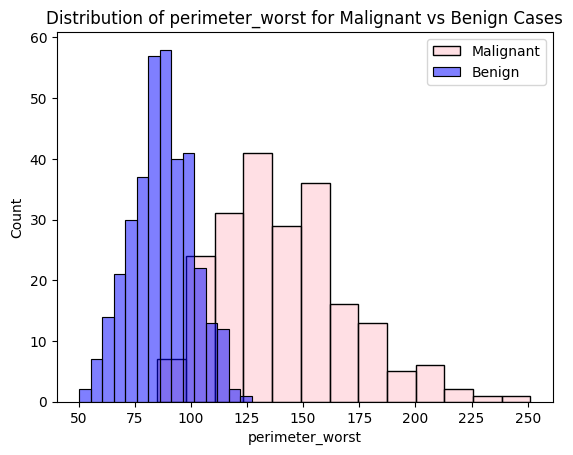

The median perimeter_worst is 138.0
The median perimeter_worst is 86.92


In [ ]:
sns.histplot(df_malignant['perimeter_worst'], color='pink', alpha=0.5, label='Malignant')
sns.histplot(df_benign['perimeter_worst'], color='blue', alpha=0.5, label='Benign')

plt.title('Distribution of perimeter_worst for Malignant vs Benign Cases')
plt.xlabel('perimeter_worst')
plt.ylabel('Count')
plt.legend()

plt.show()

print("The median perimeter_worst is", df_malignant['perimeter_worst'].median())
print("The median perimeter_worst is", df_benign['perimeter_worst'].median())

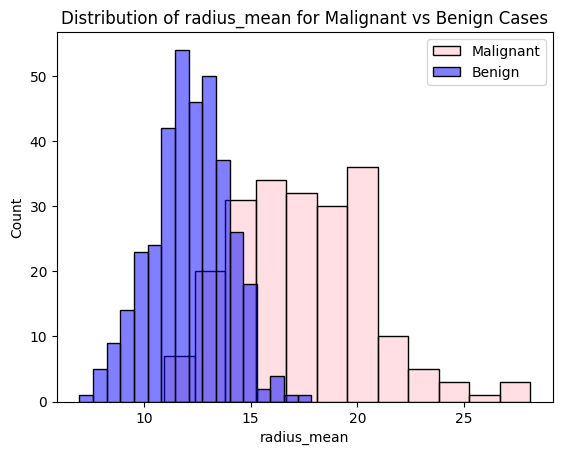

The median radius_mean is 17.325000000000003
The median radius_mean is 12.2


In [ ]:
sns.histplot(df_malignant['radius_mean'], color='pink', alpha=0.5, label='Malignant')
sns.histplot(df_benign['radius_mean'], color='blue', alpha=0.5, label='Benign')

plt.title('Distribution of radius_mean for Malignant vs Benign Cases')
plt.xlabel('radius_mean')
plt.ylabel('Count')
plt.legend()

plt.show()

print("The median radius_mean is", df_malignant['radius_mean'].median())
print("The median radius_mean is", df_benign['radius_mean'].median())

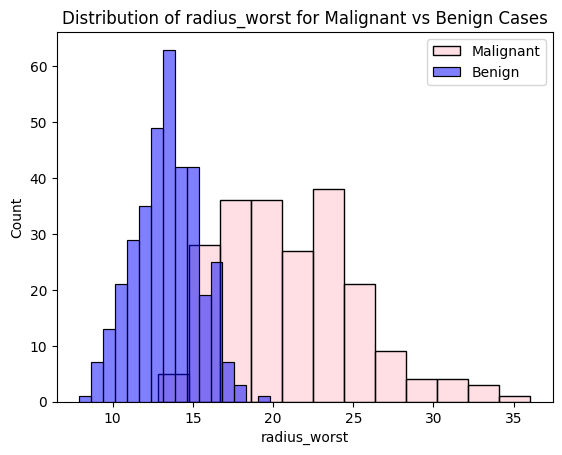

The median radius_worst is 20.59
The median radius_worst is 13.35


In [ ]:
sns.histplot(df_malignant['radius_worst'], color='pink', alpha=0.5, label='Malignant')
sns.histplot(df_benign['radius_worst'], color='blue', alpha=0.5, label='Benign')

plt.title('Distribution of radius_worst for Malignant vs Benign Cases')
plt.xlabel('radius_worst')
plt.ylabel('Count')
plt.legend()

plt.show()

print("The median radius_worst is", df_malignant['radius_worst'].median())
print("The median radius_worst is", df_benign['radius_worst'].median())

<Axes: >

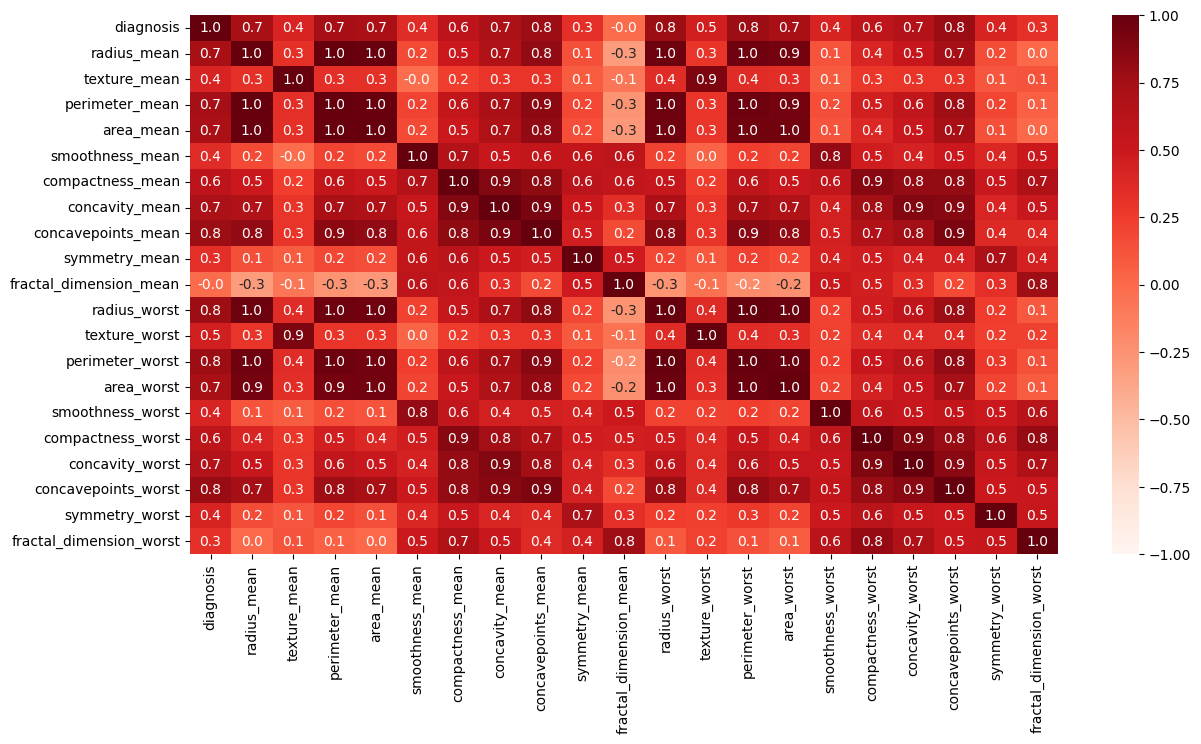

In [ ]:
#Heatmap of all variables
corr = bc.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, fmt=".1f",vmin=-1,vmax=1,cmap="Reds")

## Naive Bayes Classifier

In [ ]:
#Naive Bayes Classifier using both _mean and _worst variables
#Importing packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # The Naive Bayes algo

In [ ]:
#Separating diagnosis as the outcome variable

X = bc.drop(columns= "diagnosis")
y = bc["diagnosis"]

#Split into Train/Test in a 60/40 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

In [ ]:
#Defining the Naive Bayes Model
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Finding the accuracy of the model
y_pred = NB.predict(X_test)
accuracy_score(y_test, y_pred)

0.9254385964912281

In [ ]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[131,   9],
       [  8,  80]])

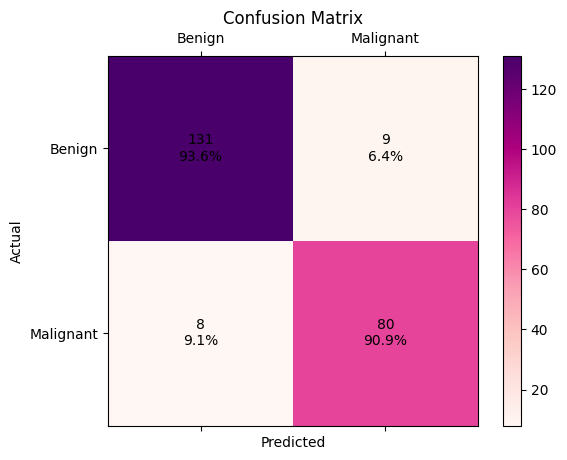

In [ ]:
#Better Visualization of the Confusion Matrix
labels = ['Benign', 'Malignant']
cm = np.array([[131, 9],
               [8, 80]])

#Create a figure and axis
fig, ax = plt.subplots()

#Confusion matrix as an image
cax = ax.matshow(cm, cmap='RdPu')

#Colorbar
cbar = fig.colorbar(cax)

#Tick labels and axis labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

#Add text inside each cell with value and percentage
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f'{cm[i, j]}\n{cm[i, j] / np.sum(cm[i]) * 100:.1f}%',
                ha='center', va='center', color='black')

# Show the plot
plt.show()

## KNN

In [ ]:
#KNN model using both _worst and _mean variables
#importing packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


In [ ]:
#Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=2, stratify=y)

In [ ]:
#Using StandardScaler() to standardize values in training data
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Value Matrix
val_matrix = np.array([[18, -6], [-18, 12]]);
val_matrix

array([[ 18,  -6],
       [-18,  12]])

In [ ]:
#Running the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


In [ ]:
#Finding the best k for highest accuracy score

results = []
for k in tqdm(range(1, 51, 1)):

    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)

    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, knn.predict(X_test_scaled)),
        'net benefit': np.sum(confusion_matrix(y_test, knn.predict(X_test_scaled)) * val_matrix)
    })

results_bc = pd.DataFrame(results)
results_bc

100%|██████████| 50/50 [00:09<00:00,  5.15it/s]


,k,accuracy,net benefit
0,1,0.947368,3252
1,2,0.938596,3186
2,3,0.956140,3306
3,4,0.942982,3216
4,5,0.956140,3312
5,6,0.947368,3252
6,7,0.951754,3288
7,8,0.951754,3276
8,9,0.951754,3288
9,10,0.956140,3312


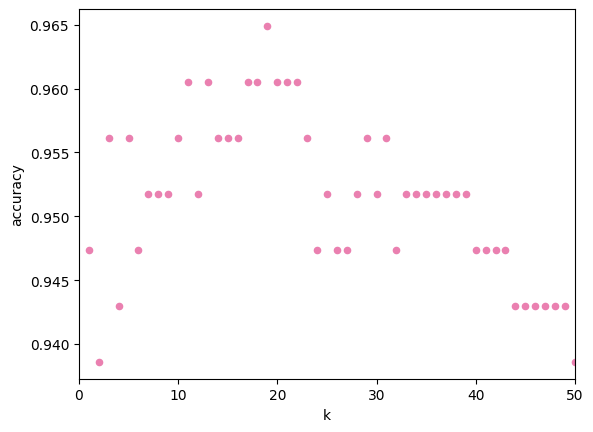

In [ ]:
# plot accuracy vs. k for visualization of best k
results_bc.plot.scatter(x='k', y='accuracy', xlim=[0, 50], color = "#EA80B0");

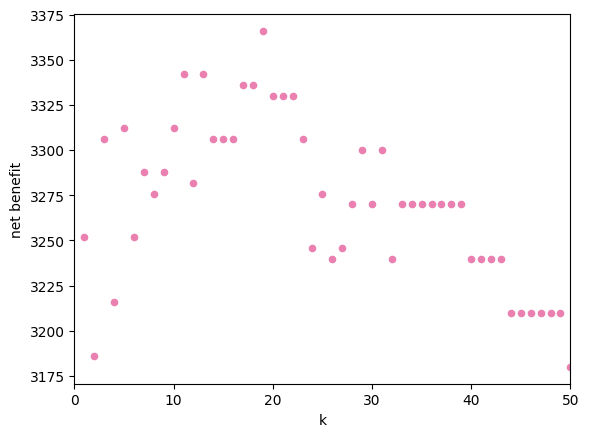

In [ ]:
#Net Benefit Scatterplot
results_bc.plot.scatter(x='k', y='net benefit', xlim=[0, 50], color = "#EA80B0");

In [ ]:
# Find the max value and associated index
max_acc = results_bc['accuracy'].max()
max_acc_idx = results_bc['accuracy'].idxmax()
max_val = results_bc['net benefit'].max()
max_val_idx = results_bc['net benefit'].idxmax()

print("Max accuracy =", max_acc, '|', " Best k =", results_bc['k'][max_acc_idx])
print("Max net benefit =", max_val, '|', " Best k =", results_bc['k'][max_val_idx])

Max accuracy = 0.9649122807017544 |  Best k = 19
Max net benefit = 3366 |  Best k = 19


In [ ]:
confusion_matrix(y_test, y_pred)

array([[141,   2],
       [  8,  77]])

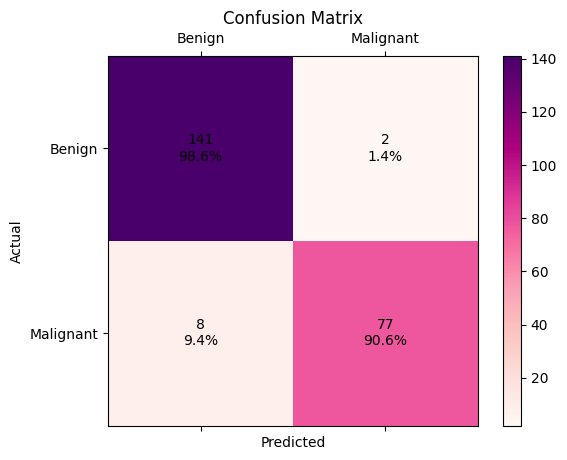

In [ ]:
#Better Visualization of the Confusion Matrix
labels = ['Benign', 'Malignant']
cm = np.array([[141, 2],
               [8, 77]])

fig, ax = plt.subplots()

#Showing confusion matrix as an image
cax = ax.matshow(cm, cmap='RdPu')

#Colorbar
cbar = fig.colorbar(cax)

#Tick labels and axis labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

#Add text inside each cell with value and percentage
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f'{cm[i, j]}\n{cm[i, j] / np.sum(cm[i]) * 100:.1f}%',
                ha='center', va='center', color='black')

plt.show()

In [ ]:
from sklearn.metrics import *

y_pred = knn.predict(X_test_scaled)

m1 = sum(y_test) #actual positives
m2 = len(y_test) - sum(y_test) #actual negatives

# Accuracy score
m3 = accuracy_score(y_test,y_pred).round(2)

# Precision score
m4 = precision_score(y_test,y_pred).round(2)

# True Positive Rate (TPR)
m5 = recall_score(y_test, y_pred).round(2)

# FPR
fp = confusion_matrix(y_test, y_pred)[0,1]; # false positives

m6 = fp / m2

# f1 score which is between [0,1] (like an R_squared)
m7 = f1_score(y_test, y_pred).round(2)

# MCC Score between [-1,1]
m8 = matthews_corrcoef(y_test, y_pred)

print ("actual positives:", m1, '|', "actual negatives:", m2, '|', "accuracy:", m3, '|', "precision:", m4, '|', "TPR:", m5, '|', 'FPR:', m6, '|' , 'f1', m7, '|', 'MCC', m8.round(2))

actual positives: 85 | actual negatives: 143 | accuracy: 0.94 | precision: 0.99 | TPR: 0.85 | FPR: 0.006993006993006993 | f1 0.91 | MCC 0.87


## Decision Trees

In [ ]:
#Importing necessary packages
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import *
%matplotlib inline

In [ ]:
#Separate diagnosis as the outcome
X = bc.drop(columns= "diagnosis")
y = bc["diagnosis"]

#Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

In [ ]:
fullTree = DecisionTreeClassifier(random_state = 2)
fullTree.fit(X_train, y_train)

y_pred = fullTree.predict(X_test)

Mean squared error: 0.09210526315789473


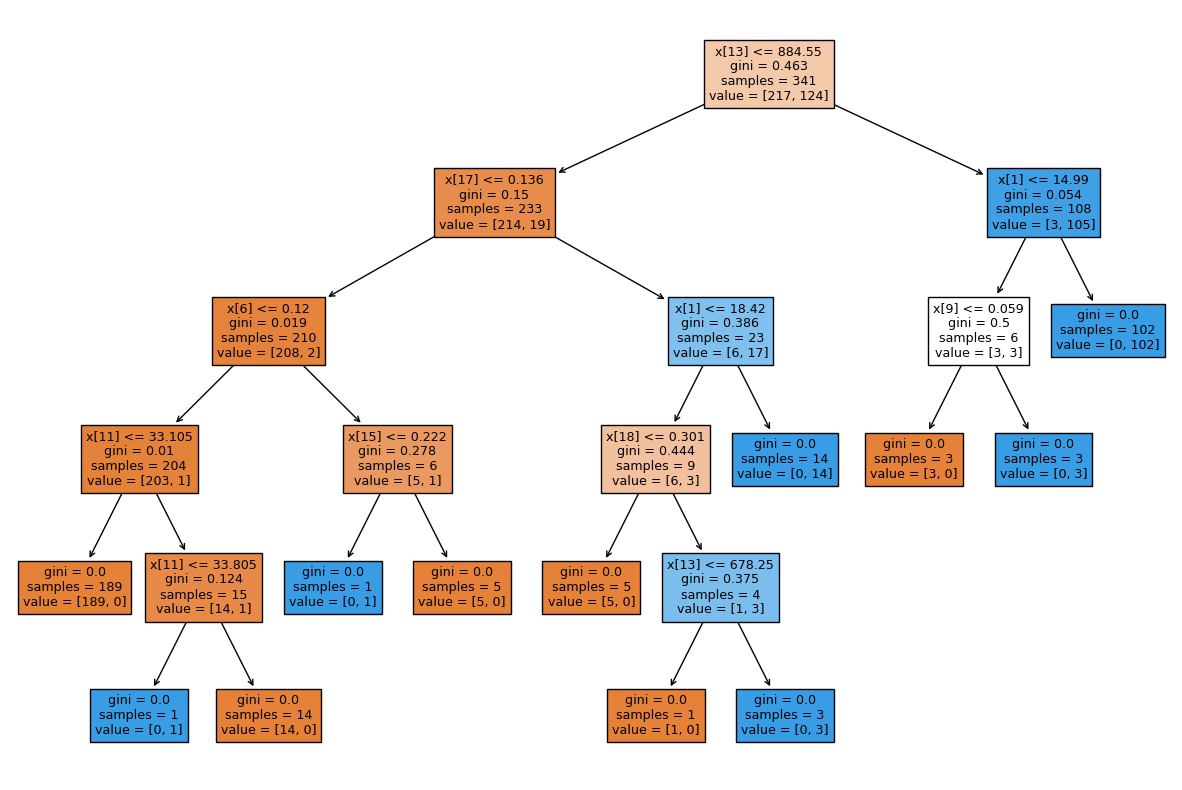

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(fullTree, filled=True);
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

In [ ]:
print('Number of classes: ', fullTree.tree_.n_classes)
print('Number of features: ', fullTree.tree_.n_features)
print('Number of nodes: ', fullTree.tree_.node_count)
print('Number of leaves: ', fullTree.tree_.n_leaves)
print('Number of maximum depth: ', fullTree.tree_.max_depth)

Number of classes:  [2]
Number of features:  20
Number of nodes:  23
Number of leaves:  12
Number of maximum depth:  5


In [ ]:
#Predicting y output
y_pred_train = fullTree.predict(X_train)
y_pred_test = fullTree.predict(X_test)

In [ ]:
#Looking for the accuracy score
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Accuracy score of full tree on training data =', round(train_score*100,1), '%')
print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

Accuracy score of full tree on training data = 100.0 %
Accuracy score of full tree on testing data = 90.8 %


In [ ]:
#Confusion Matrix
print("Confusion Matrix on train data (watch out for overfitting!):")
print(confusion_matrix(y_train, y_pred_train))

print("Confusion Matrix of full tree on test data:")
print(confusion_matrix(y_test, y_pred_test))

#Outputs 3 False Positives, and 3 False Negatives

Confusion Matrix on train data (watch out for overfitting!):
[[217   0]
 [  0 124]]
Confusion Matrix of full tree on test data:
[[126  14]
 [  7  81]]


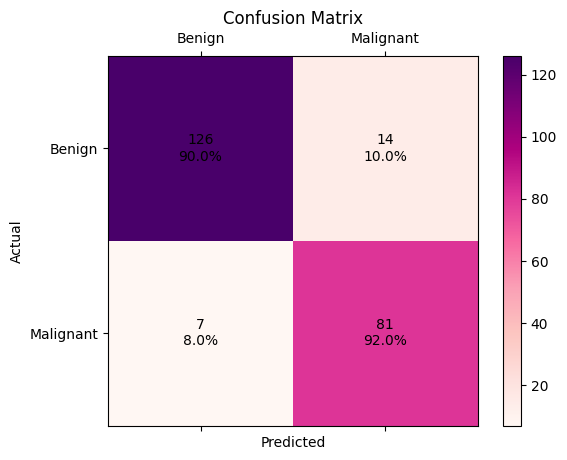

In [ ]:
#Better Visualization of the Confusion Matrix
labels = ['Benign', 'Malignant']
cm = np.array([[126, 14],
               [7, 81]])

#Create a figure and axis
fig, ax = plt.subplots()

#Confusion matrix as an image
cax = ax.matshow(cm, cmap='RdPu')

#Colorbar
cbar = fig.colorbar(cax)

#Tick labels and axis labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

#Add text inside each cell with value and percentage
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f'{cm[i, j]}\n{cm[i, j] / np.sum(cm[i]) * 100:.1f}%',
                ha='center', va='center', color='black')

# Show the plot
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cb_matrix = np.array([[18, -6], [-18, 12]])
net_benefit = np.sum(cb_matrix * cm)
print(net_benefit)

3030


RMSE: 0.2800484888209922


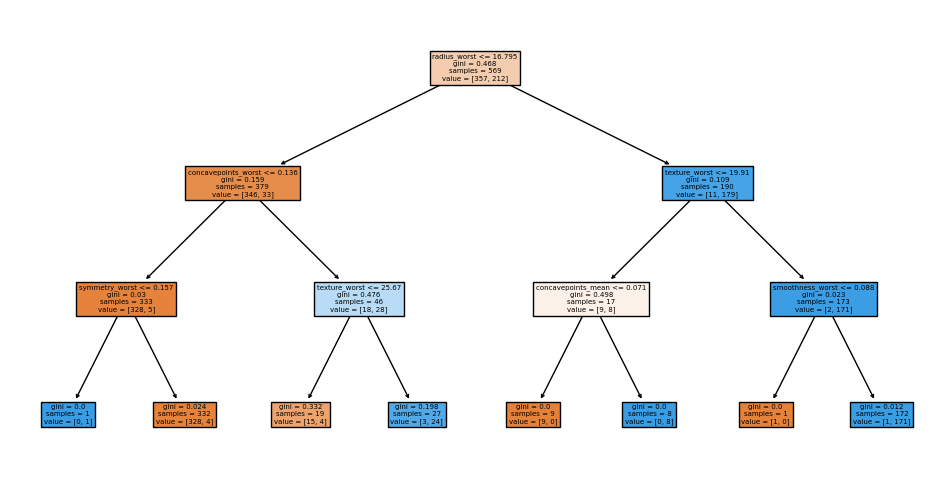

In [ ]:
n_folds = 5

param_grid = {'max_depth': [3, 5, 7, 9, 11]}
classifier = DecisionTreeClassifier(random_state=2)
kf = KFold(n_splits=n_folds, shuffle=True, random_state=2)
rmse_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    grid_search = GridSearchCV(classifier, param_grid, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    classifier_cv = DecisionTreeClassifier(random_state=1, **best_params)
    classifier_cv.fit(X_train, y_train)

    y_pred = classifier_cv.predict(X_test)
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))


rmse_mean = np.mean(rmse_list)
rmse_std = np.std(rmse_list)

print("RMSE:", rmse_mean)

classifier_final = DecisionTreeClassifier(random_state = 2, **best_params)
classifier_final.fit(X, y)

plt.figure(figsize=(12, 6))
plot_tree(classifier_final, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
print('Number of classes: ', classifier_final.tree_.n_classes)
print('Number of features: ', classifier_final.tree_.n_features)
print('Number of nodes: ', classifier_final.tree_.node_count)
print('Number of leaves: ', classifier_final.tree_.n_leaves)
print('Number of maximum depth: ', classifier_final.tree_.max_depth)

Number of classes:  [2]
Number of features:  20
Number of nodes:  15
Number of leaves:  8
Number of maximum depth:  3


In [ ]:
#Checking Confusion Matrix of reduced tree to see if there are any improvements
y_pred = classifier_final.predict(X_test)

print("Accuracy score of reduced tree on test data :", accuracy_score(y_test, y_pred)*100, "%")

print("Confusion Matrix of reduced tree on test data:")
confusion_matrix(y_test, y_pred)

#Result:
#Reducing the False Negatives is good-- we're reducing the amount of women that have malignant tumors but aren't diagnosed as such.

Accuracy score of reduced tree on test data : 98.23008849557522 %
Confusion Matrix of reduced tree on test data:


array([[70,  0],
       [ 2, 41]])

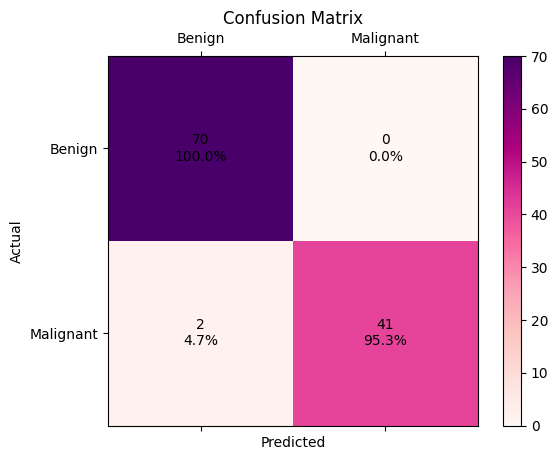

In [ ]:
#Better Visualization of the Confusion Matrix
labels = ['Benign', 'Malignant']
cm = np.array([[70, 0],
               [2, 41]])

#Create a figure and axis
fig, ax = plt.subplots()

#Confusion matrix as an image
cax = ax.matshow(cm, cmap='RdPu')

#Colorbar
cbar = fig.colorbar(cax)

#Tick labels and axis labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

#Add text inside each cell with value and percentage
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f'{cm[i, j]}\n{cm[i, j] / np.sum(cm[i]) * 100:.1f}%',
                ha='center', va='center', color='black')

# Show the plot
plt.show()

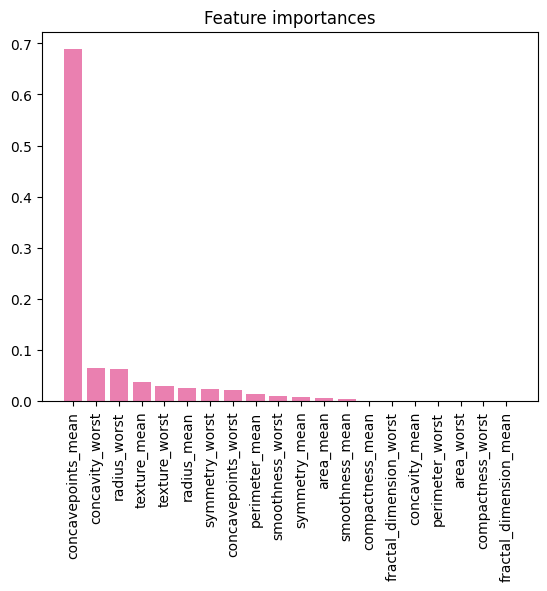

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X.columns

# Sort the features by importance
indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

# Create the bar chart of feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], color = "#EA80B0")
plt.xticks(range(len(importances)), sorted_feature_names, rotation='vertical')
plt.show()

## Random Forest

In [ ]:
#Importing Packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
#New Train/Test Split
X = bc.drop(columns= "diagnosis")
y = bc["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#Finding RMSE of Random Forest Model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  0.23878346647045964


In [ ]:
from sklearn.model_selection import GridSearchCV

#Using GridSearchCV to find the best parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best hyperparameters:', grid_search.best_params_)
print('Best cross-validation score:', grid_search.best_score_)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.9677323103154306


RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=0)

In [ ]:
#Finding RMSE from the best Random Forest
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.24779731389167603


In [ ]:
y_pred = best_rf.predict(X_test)

print("Accuracy score of reduced tree on test data :", accuracy_score(y_test, y_pred)*100, "%")

print("Confusion Matrix of reduced tree on test data:")
confusion_matrix(y_test, y_pred)

Accuracy score of reduced tree on test data : 93.85964912280701 %
Confusion Matrix of reduced tree on test data:


array([[135,   5],
       [  9,  79]])

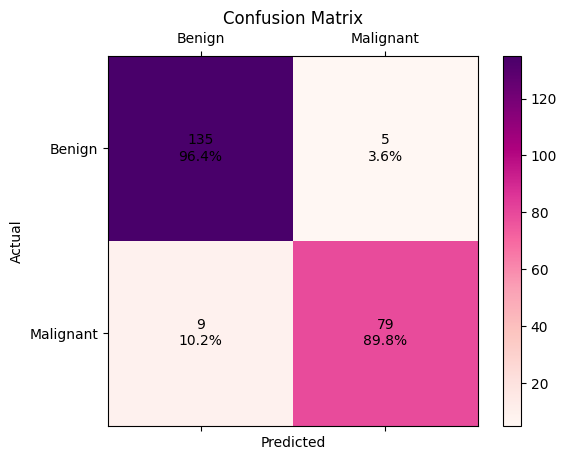

In [ ]:
#Better Visualization of the Confusion Matrix
labels = ['Benign', 'Malignant']
cm = np.array([[135, 5],
               [9, 79]])

#Create a figure and axis
fig, ax = plt.subplots()

#Confusion matrix as an image
cax = ax.matshow(cm, cmap='RdPu')

#Colorbar
cbar = fig.colorbar(cax)

#Tick labels and axis labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

#Add text inside each cell with value and percentage
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f'{cm[i, j]}\n{cm[i, j] / np.sum(cm[i]) * 100:.1f}%',
                ha='center', va='center', color='black')

# Show the plot
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cb_matrix = np.array([[18, -6], [-18, 12]])
net_benefit = np.sum(cb_matrix * cm)
print(net_benefit)

3186


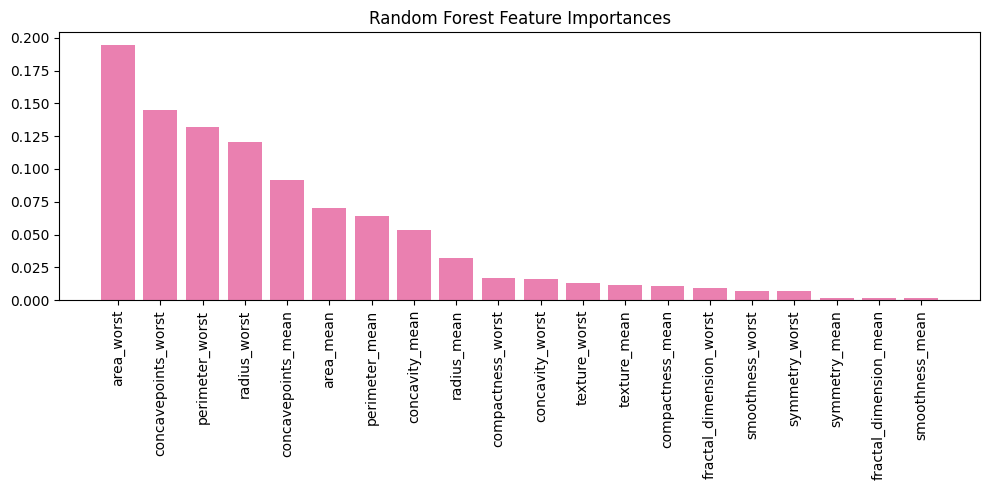

In [ ]:
#Feature Importances Visualization

featureNames = bc.drop('diagnosis', axis = 1)
feature_names = list(featureNames.columns)

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(indices)), importances[indices], color="#EA80B0", align='center')
plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation='vertical')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Logistic Regression

In [ ]:
#Import packages
from sklearn.linear_model import LogisticRegression
import math

In [ ]:
#New Train/Test Split
y = bc['diagnosis']
X = bc.drop(columns=['diagnosis'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.4, random_state = 2, stratify = y)

In [ ]:
#Fitting the LR model
lr = LogisticRegression(solver='lbfgs', penalty=None)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [ ]:
# Run class y predictions
y_pred = lr.predict(X_test)

In [ ]:
#Getting y_pred
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[136,   7],
       [  7,  78]])

In [ ]:
# accuracy score
accuracy_score(y_test, y_pred)

0.9385964912280702

In [ ]:
# What if we want to change the default probability cutoff of 0.5?

# Extract regressed probabilities using predict_proba
p_pred=lr.predict_proba(X_test)[:,1]
np.round(p_pred,3)

array([0.002, 0.003, 1.   , 0.101, 0.002, 0.962, 0.002, 0.002, 1.   ,
       0.003, 0.046, 0.002, 0.   , 0.435, 1.   , 0.001, 0.104, 0.719,
       0.005, 0.001, 0.   , 0.023, 0.01 , 0.047, 0.015, 1.   , 1.   ,
       0.   , 0.001, 1.   , 0.002, 0.   , 0.025, 0.993, 1.   , 1.   ,
       0.997, 0.002, 0.606, 0.005, 0.   , 0.005, 1.   , 1.   , 0.016,
       0.   , 0.018, 1.   , 1.   , 0.001, 0.004, 0.016, 0.038, 0.358,
       1.   , 0.001, 0.   , 0.001, 0.   , 0.838, 0.   , 0.366, 0.   ,
       0.972, 0.002, 0.001, 0.   , 0.061, 0.003, 0.001, 0.041, 0.004,
       0.003, 0.027, 0.   , 0.033, 0.003, 1.   , 0.   , 0.142, 1.   ,
       1.   , 0.97 , 0.001, 0.996, 0.   , 0.993, 1.   , 0.001, 0.001,
       1.   , 0.001, 1.   , 0.004, 0.004, 0.   , 0.918, 0.   , 0.011,
       0.961, 1.   , 0.004, 0.09 , 1.   , 1.   , 1.   , 0.018, 0.926,
       0.999, 0.   , 0.1  , 1.   , 1.   , 0.   , 1.   , 0.953, 1.   ,
       0.002, 1.   , 0.913, 1.   , 0.004, 0.005, 0.   , 0.002, 0.141,
       0.012, 0.868,

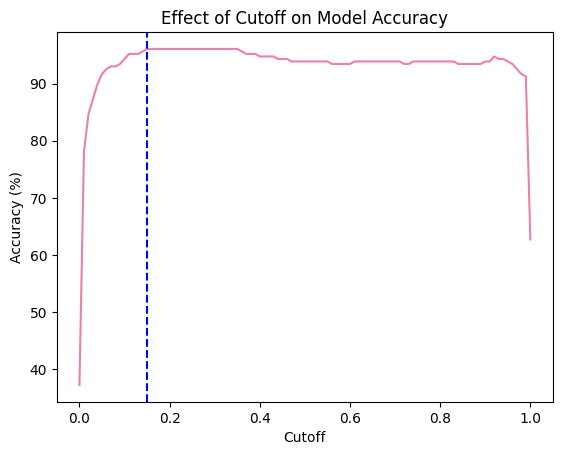

Best cutoff value: 0.15


In [ ]:
cutoffs = np.linspace(0, 1, 101)
cutoff_vec = np.array([])

# Look through each threshold, to compute new confusion matrix and resulting net value
for cutoff_i in cutoffs:
    # Define new y_pred vector using custom threshold
    y_pred_new = [1 if i > cutoff_i else 0 for i in p_pred]

    # Compute the new accuracy score for this threshold
    accuracy = accuracy_score(y_test, y_pred_new)

    # Append the accuracy score to the cutoff_vec array
    cutoff_vec = np.append(cutoff_vec, accuracy * 100)

# Find the cutoff value with the highest accuracy
best_cutoff = cutoffs[np.argmax(cutoff_vec)]
best_accuracy = np.max(cutoff_vec)

# Plot the accuracy scores for each cutoff value
plt.plot(cutoffs, cutoff_vec, color = "#EA80B0")
plt.xlabel('Cutoff')
plt.ylabel('Accuracy (%)')
plt.title('Effect of Cutoff on Model Accuracy')
plt.axvline(x=0.15, linestyle='--', color='b')
plt.show()

print(f"Best cutoff value: {best_cutoff:.2f}")

In [ ]:
# Define new cutoff
cutoff = 0.25
y_pred_new=[1 if i > cutoff else 0 for i in p_pred]
y_pred_new

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1]

In [ ]:
# confusion matrix with different cutoff
confusion_matrix(y_test,y_pred_new)

array([[136,   7],
       [  2,  83]])

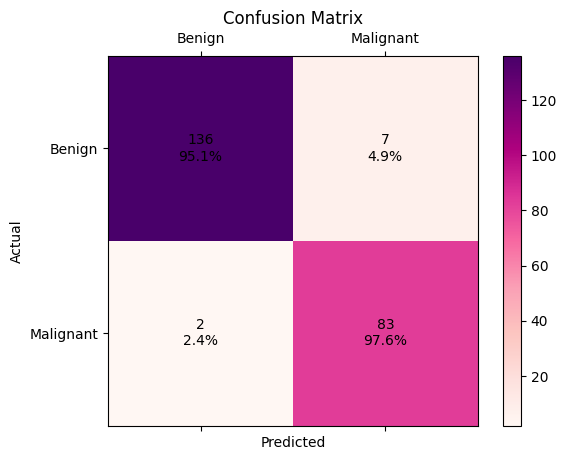

In [ ]:
#Better Visualization of the Confusion Matrix
labels = ['Benign', 'Malignant']
cm = np.array([[136, 7],
               [2, 83]])

#Create a figure and axis
fig, ax = plt.subplots()

#Confusion matrix as an image
cax = ax.matshow(cm, cmap='RdPu')

#Colorbar
cbar = fig.colorbar(cax)

#Tick labels and axis labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

#Add text inside each cell with value and percentage
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, f'{cm[i, j]}\n{cm[i, j] / np.sum(cm[i]) * 100:.1f}%',
                ha='center', va='center', color='black')

# Show the plot
plt.show()

In [ ]:
# accuracy score with different cutoff
accuracy_score(y_test, y_pred_new)

0.9605263157894737

In [ ]:
# Store coefficients
lr_int = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print original coefficients
print('intercept ', lr_int)
print(pd.DataFrame({'coeff': lr_coef}, index=X.columns))

intercept  -0.5009628017243756
                            coeff
radius_mean             -3.345468
texture_mean             0.053441
perimeter_mean           0.503675
area_mean               -0.011161
smoothness_mean          0.176336
compactness_mean         0.639237
concavity_mean           0.935679
concavepoints_mean       0.411078
symmetry_mean            0.268852
fractal_dimension_mean   0.051670
radius_worst            -2.887049
texture_worst            0.249647
perimeter_worst          0.038428
area_worst               0.051429
smoothness_worst         0.251783
compactness_worst        1.442489
concavity_worst          1.936428
concavepoints_worst      0.648377
symmetry_worst           0.663466
fractal_dimension_worst  0.157639


In [ ]:
# print exponentiated coefficients
for i, col in enumerate(X.columns):
    print(f"{col}:{math.exp(lr_coef[i])}")

radius_mean:0.03524370528274535
texture_mean:1.0548951790170573
perimeter_mean:1.6547910192306992
area_mean:0.9889012102941668
smoothness_mean:1.1928391302485848
compactness_mean:1.8950352556933638
concavity_mean:2.548944438345808
concavepoints_mean:1.5084429324865727
symmetry_mean:1.3084614657057716
fractal_dimension_mean:1.053028128043464
radius_worst:0.055740449092697035
texture_worst:1.283572729782747
perimeter_worst:1.0391760577164262
area_worst:1.0527744054039605
smoothness_worst:1.2863168146367576
compactness_worst:4.231214696175121
concavity_worst:6.933936476432466
concavepoints_worst:1.9124335914256438
symmetry_worst:1.9415102475985389
fractal_dimension_worst:1.1707439091008294


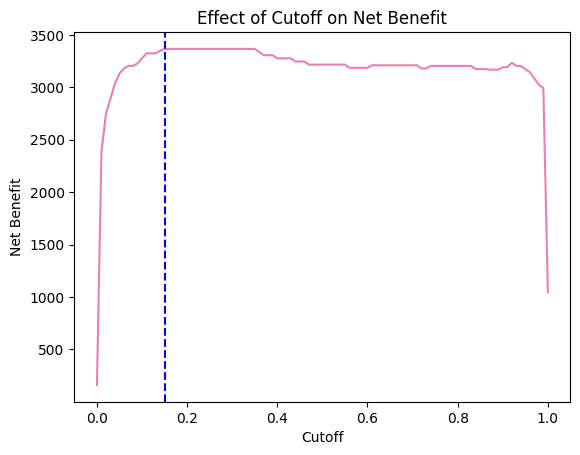

Best cutoff value: 0.15
Highest net benefit: 3366.00


In [ ]:
cutoffs = np.linspace(0, 1, 101)
cutoff_vec = np.zeros(101)

# Define the value matrix
val_matrix = np.array([[18, -6], [-18, 12]])

# Look through each threshold, to compute new confusion matrix and resulting net value
for i, cutoff_i in enumerate(cutoffs):
    # Define new y_pred vector using custom threshold
    y_pred_new = [1 if i > cutoff_i else 0 for i in p_pred]

    # Compute the new confusion matrix for this threshold
    cm_new = confusion_matrix(y_test, y_pred_new)

    # Compute the net value for this threshold
    netval = np.sum(cm_new * val_matrix)

    # Set the value in cutoff_vec to the net value for this cutoff
    cutoff_vec[i] = netval

# Find the cutoff value with the highest net benefit
best_cutoff = cutoffs[np.argmax(cutoff_vec)]
best_netval = np.max(cutoff_vec)

# Plot the net benefits for each cutoff value
plt.plot(cutoffs, cutoff_vec, color = "#EA80B0")
plt.xlabel('Cutoff')
plt.ylabel('Net Benefit')
plt.title('Effect of Cutoff on Net Benefit')
plt.axvline(x=0.15, linestyle='--', color='b')
plt.show()

print(f"Best cutoff value: {best_cutoff:.2f}")
print(f"Highest net benefit: {best_netval:.2f}")

In [ ]:
m1 = sum(y_test) #actual positives
m2 = len(y_test) - sum(y_test) #actual negatives
m3 = accuracy_score(y_test,y_pred).round(2)
m4 = precision_score(y_test,y_pred).round(2)

#True Positive Rate (TPR)
m5 = recall_score(y_test, y_pred).round(2)

# FPR
fp = confusion_matrix(y_test, y_pred)[0,1]; # false positives

m6 = fp / m2

#f1 score which is between [0,1] (like an R_squared)
m7 = f1_score(y_test, y_pred).round(2)

#MCC Score between [-1,1]
m8 = matthews_corrcoef(y_test, y_pred)

print ("actual positives:", m1, '|', "actual negatives:", m2, '|', "accuracy:", m3, '|', "precision:", m4, '|', "TPR:", m5, '|', 'FPR:', m6, '|' , 'f1', m7, '|', 'MCC', m8.round(2))

actual positives: 85 | actual negatives: 143 | accuracy: 0.94 | precision: 0.92 | TPR: 0.92 | FPR: 0.04895104895104895 | f1 0.92 | MCC 0.87


## Neural Networks

In [ ]:
#Importing packages

%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os
os.environ['PYTHONHASHSEED'] = '0'
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
df1.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,True


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concavepoints_mean       569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_worst             569 non-null    float64
 11  texture_worst            569 non-null    float64
 12  perimeter_worst          569 non-null    float64
 13  area_worst               569 non-null    float64
 14  smoothness_worst         5

In [ ]:
# Data exploration: look at number of unique entries for some of the columns
print(df1.radius_mean.unique())
print(df1.texture_mean.unique())
print(df1.diagnosis_M.unique())

[17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11.8   14.44  13.74
  8.219  9.731 11.

In [ ]:
# separate out output neuron and input neurons
y_nonscaled = df1[['diagnosis_M']]
X_nonscaled = df1.drop(columns=['diagnosis_M'])
X_nonscaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#New Train/Test Split
# normalize the data into [0,1] range
# MinMax = (X - Xmin) / (Xmax - Xmin)

scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

y = scaleOutput.fit_transform(y_nonscaled)
X = scaleInput.fit_transform(X_nonscaled)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
#20 neurons in input layer 1, 4 neurons in hidden layer 1, 1 neuron in the output layer)
model = Sequential()
model.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])

#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 3
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath ='mybestneural2', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)

history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a,callback_b])

Epoch 1/256
35/35 [==============================] - 1s 13ms/step - loss: 0.6550 - accuracy: 0.4751 - val_loss: 0.6517 - val_accuracy: 0.5877
Epoch 2/256
35/35 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.6686 - val_loss: 0.6315 - val_accuracy: 0.7544
Epoch 3/256
35/35 [==============================] - 0s 9ms/step - loss: 0.6009 - accuracy: 0.7947 - val_loss: 0.6190 - val_accuracy: 0.6579
Epoch 4/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5790 - accuracy: 0.7801 - val_loss: 0.5968 - val_accuracy: 0.7939
Epoch 5/256
35/35 [==============================] - 0s 9ms/step - loss: 0.5590 - accuracy: 0.8534 - val_loss: 0.5845 - val_accuracy: 0.7456
Epoch 6/256
35/35 [==============================] - 0s 10ms/step - loss: 0.5419 - accuracy: 0.8446 - val_loss: 0.5663 - val_accuracy: 0.8289
Epoch 7/256
35/35 [==============================] - 0s 9ms/step - loss: 0.5246 - accuracy: 0.8622 - val_loss: 0.5522 - val_accuracy: 0.8202
Epoch 8/25

In [ ]:
#20 neurons in input layer 1, 4 neurons in hidden layer 1, 1 neuron in the output layer)
# Define the model

model0 = Sequential()
model0.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model0.add(Dense(6, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))
model0.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 3
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a0 = ModelCheckpoint(filepath ='mybestneural2', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b0 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)

history = model0.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a0,callback_b0])

Epoch 1/256
35/35 [==============================] - 1s 12ms/step - loss: 0.6693 - accuracy: 0.5543 - val_loss: 0.6627 - val_accuracy: 0.6140
Epoch 2/256
35/35 [==============================] - 0s 6ms/step - loss: 0.6381 - accuracy: 0.6510 - val_loss: 0.6403 - val_accuracy: 0.7368
Epoch 3/256
35/35 [==============================] - 0s 5ms/step - loss: 0.6083 - accuracy: 0.7830 - val_loss: 0.6133 - val_accuracy: 0.7149
Epoch 4/256
35/35 [==============================] - 0s 6ms/step - loss: 0.5726 - accuracy: 0.8328 - val_loss: 0.5742 - val_accuracy: 0.8509
Epoch 5/256
35/35 [==============================] - 0s 5ms/step - loss: 0.5355 - accuracy: 0.9091 - val_loss: 0.5410 - val_accuracy: 0.8465
Epoch 6/256
35/35 [==============================] - 0s 6ms/step - loss: 0.4983 - accuracy: 0.9179 - val_loss: 0.5031 - val_accuracy: 0.8947
Epoch 7/256
35/35 [==============================] - 0s 8ms/step - loss: 0.4585 - accuracy: 0.9208 - val_loss: 0.4652 - val_accuracy: 0.8991
Epoch 8/256


In [ ]:
#20 neurons in input layer 1, 4 neurons in hidden layer 1, 1 neuron in the output layer)
# Define the model

model00 = Sequential()
model00.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model00.add(Dense(8, activation='relu'))
model00.add(Dense(1, activation='sigmoid'))
model00.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 3
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a00 = ModelCheckpoint(filepath ='mybestneural2', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b00 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)

history = model00.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a00,callback_b00])

Epoch 1/256
35/35 [==============================] - 6s 99ms/step - loss: 0.7019 - accuracy: 0.3871 - val_loss: 0.6855 - val_accuracy: 0.3947
Epoch 2/256
35/35 [==============================] - 1s 20ms/step - loss: 0.6578 - accuracy: 0.5543 - val_loss: 0.6479 - val_accuracy: 0.7193
Epoch 3/256
35/35 [==============================] - 0s 7ms/step - loss: 0.6097 - accuracy: 0.8387 - val_loss: 0.5995 - val_accuracy: 0.8202
Epoch 4/256
35/35 [==============================] - 0s 10ms/step - loss: 0.5551 - accuracy: 0.8798 - val_loss: 0.5468 - val_accuracy: 0.8904
Epoch 5/256
35/35 [==============================] - 0s 11ms/step - loss: 0.5025 - accuracy: 0.8856 - val_loss: 0.5029 - val_accuracy: 0.8728
Epoch 6/256
35/35 [==============================] - 0s 9ms/step - loss: 0.4527 - accuracy: 0.9238 - val_loss: 0.4541 - val_accuracy: 0.8991
Epoch 7/256
35/35 [==============================] - 0s 10ms/step - loss: 0.4016 - accuracy: 0.9150 - val_loss: 0.4092 - val_accuracy: 0.8991
Epoch 8/

In [ ]:
#20 neurons in input layer 1, 4 neurons in hidden layer 1, 1 neuron in the output layer)
# Define the model

model000 = Sequential()
model000.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model000.add(Dense(32, activation='relu'))
model000.add(Dense(1, activation='sigmoid'))
model000.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 3
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a000 = ModelCheckpoint(filepath ='mybestneural2', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b000 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)

history = model000.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a000,callback_b000])

Epoch 1/256
35/35 [==============================] - 1s 9ms/step - loss: 0.6368 - accuracy: 0.7947 - val_loss: 0.6094 - val_accuracy: 0.8640
Epoch 2/256
35/35 [==============================] - 0s 5ms/step - loss: 0.5705 - accuracy: 0.8827 - val_loss: 0.5477 - val_accuracy: 0.8596
Epoch 3/256
35/35 [==============================] - 0s 5ms/step - loss: 0.4968 - accuracy: 0.8739 - val_loss: 0.4803 - val_accuracy: 0.8728
Epoch 4/256
35/35 [==============================] - 0s 4ms/step - loss: 0.4189 - accuracy: 0.8915 - val_loss: 0.4150 - val_accuracy: 0.8816
Epoch 5/256
35/35 [==============================] - 0s 5ms/step - loss: 0.3535 - accuracy: 0.8974 - val_loss: 0.3646 - val_accuracy: 0.8991
Epoch 6/256
35/35 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.9120 - val_loss: 0.3253 - val_accuracy: 0.8816
Epoch 7/256
35/35 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.9208 - val_loss: 0.2907 - val_accuracy: 0.9035
Epoch 8/256
3

In [ ]:
#16 neurons in layer 1, 8 neurons in layer 2, 1 neuron in the last layer)
# Define the model

model1 = Sequential()
model1.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
print(model1.summary())
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 20
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a1 = ModelCheckpoint(filepath ='mybestneural2', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b1 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)
history = model1.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a1,callback_b1])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                420       
                                                                 
 dense_13 (Dense)            (None, 4)                 84        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/256
35/35 [==============================] - 1s 11ms/step - loss: 0.6716 - accuracy: 0.7097 - val_loss: 0.6520 - val_accuracy: 0.7544
Epoch 2/2

In [ ]:
#16 neurons in layer 1, 8 neurons in layer 2, 1 neuron in the last layer)
# Define the model

model11 = Sequential()
model11.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model11.add(Dense(6, activation='relu'))
model11.add(Dense(6, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
print(model11.summary())
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 20
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a11 = ModelCheckpoint(filepath ='mybestneural2', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b11 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)
history = model11.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a11,callback_b11])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 20)                420       
                                                                 
 dense_17 (Dense)            (None, 6)                 126       
                                                                 
 dense_18 (Dense)            (None, 6)                 42        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 595 (2.32 KB)
Trainable params: 595 (2.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/256
35/35 [==============================] - 2s 12ms/step - loss: 0.6825 - accuracy: 0.6041 - val_loss: 0.6731 - val_accuracy: 0.8114
Epoch 2/2

In [ ]:
#16 neurons in layer 1, 8 neurons in layer 2, 1 neuron in the last layer)
# Define the model

model111 = Sequential()
model111.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model111.add(Dense(8, activation='relu'))
model111.add(Dense(8, activation='relu'))
model111.add(Dense(1, activation='sigmoid'))
model111.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
print(model111.summary())
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 20
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a111 = ModelCheckpoint(filepath ='mybestneural111', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b111 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)
history1111 = model111.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a111,callback_b111])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                420       
                                                                 
 dense_21 (Dense)            (None, 8)                 168       
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 669 (2.61 KB)
Trainable params: 669 (2.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/256
35/35 [==============================] - 3s 27ms/step - loss: 0.6752 - accuracy: 0.6891 - val_loss: 0.6542 - val_accuracy: 0.8333
Epoch 2/2

In [ ]:
# Save the model
model111.save('mybestneural111.h5')
from tensorflow.keras.models import load_model
# Load the model
loaded_model = load_model('mybestneural111.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Assuming you have already trained and saved your neural network model

# Load the model
from tensorflow.keras.models import load_model
model = loaded_model

# Assuming you have test data X_test
# Perform any necessary preprocessing on X_test

# Get predictions from the model
predictions = model.predict(X_valid)

# The predictions will be in the form of probability scores for each class
# If it is a binary classification problem, you can convert the probabilities to class labels
y_pred = (predictions > 0.5).astype(int)

# Print the predicted labels
print(y_pred)

8/8 [==============================] - 0s 5ms/step
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]

[[141   7]
 [  5  75]]


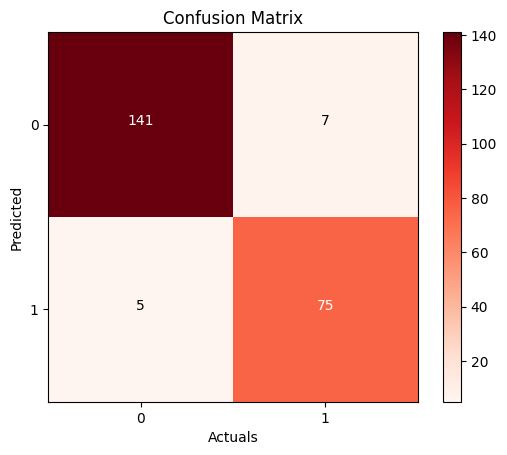

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Print the confusion matrix
print(cm)

# Visualize the confusion matrix with a red colormap
plt.imshow(cm, cmap='Reds')
plt.colorbar()
plt.xlabel("Actuals")
plt.ylabel("Predicted")
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.title("Confusion Matrix")
# Add text annotations for each matrix element
thresh = cm.max() / 2.0  # Threshold for text color change
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

# Show or save the plot

plt.show()

In [ ]:
# Define the cost-benefit matrix (2x2 matrix)
cost_benefit_matrix = np.array([[12000, -6000], [-18000, 18000]])

# Define the confusion matrix (2x2 matrix)
confusion_matrix = np.array([[144, 4], [5, 75]])

# Calculate the net value
net_value = np.sum(cost_benefit_matrix * confusion_matrix)

# Print the net value
print("Net Value:", net_value)

Net Value: 2964000


In [ ]:
#16 neurons in layer 1, 8 neurons in layer 2, 1 neuron in the last layer)
# Define the model

tf.random.set_seed(0)
model1111 = Sequential()
model1111.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model1111.add(Dense(32, activation='relu'))
model1111.add(Dense(16, activation='relu'))
model1111.add(Dense(1, activation='sigmoid'))
model1111.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
print(model1111.summary())
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 20
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a1111 = ModelCheckpoint(filepath ='mybestneural2', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b1111 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)
history = model1111.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a1111,callback_b1111])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                420       
                                                                 
 dense_25 (Dense)            (None, 32)                672       
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1637 (6.39 KB)
Trainable params: 1637 (6.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/256
35/35 [==============================] - 2s 25ms/step - loss: 0.6571 - accuracy: 0.7126 - val_loss: 0.6138 - val_accuracy: 0.9079
Epoch 2

In [ ]:
#16 neurons in layer 1, 8 neurons in layer 2, 1 neuron in the last layer)
# Define the model

model2 = Sequential()
model2.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())
model2.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 20
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a2 = ModelCheckpoint(filepath ='mybestneural3', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b2 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)
history2 = model2.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a2,callback_b2])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 20)                420       
                                                                 
 dense_29 (Dense)            (None, 4)                 84        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 1)                 5         
                                                                 
Total params: 549 (2.14 KB)
Trainable params: 549 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/256
35/35 [

In [ ]:
#16 neurons in layer 1, 8 neurons in layer 2, 1 neuron in the last layer)
# Define the model

model21 = Sequential()
model21.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model21.add(Dense(6, activation='relu'))
model21.add(Dense(6, activation='relu'))
model21.add(Dense(6, activation='relu'))
model21.add(Dense(1, activation='sigmoid'))
print(model21.summary())
model21.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 20
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a21 = ModelCheckpoint(filepath ='mybestneural3', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b21 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)
history2 = model21.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a21,callback_b21])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 20)                420       
                                                                 
 dense_34 (Dense)            (None, 6)                 126       
                                                                 
 dense_35 (Dense)            (None, 6)                 42        
                                                                 
 dense_36 (Dense)            (None, 6)                 42        
                                                                 
 dense_37 (Dense)            (None, 1)                 7         
                                                                 
Total params: 637 (2.49 KB)
Trainable params: 637 (2.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/256
35/35 [

In [ ]:
#16 neurons in layer 1, 8 neurons in layer 2, 1 neuron in the last layer)
# Define the model

model211 = Sequential()
model211.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model211.add(Dense(8, activation='relu'))
model211.add(Dense(8, activation='relu'))
model211.add(Dense(8, activation='relu'))
model211.add(Dense(1, activation='sigmoid'))
print(model211.summary())
model211.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 20
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a211 = ModelCheckpoint(filepath ='mybestneural3', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b211 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)
history2 = model211.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a211,callback_b211])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 20)                420       
                                                                 
 dense_39 (Dense)            (None, 8)                 168       
                                                                 
 dense_40 (Dense)            (None, 8)                 72        
                                                                 
 dense_41 (Dense)            (None, 8)                 72        
                                                                 
 dense_42 (Dense)            (None, 1)                 9         
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/256
35/35 

In [ ]:
#16 neurons in layer 1, 8 neurons in layer 2, 1 neuron in the last layer)
# Define the model

model2111 = Sequential()
model2111.add(Dense(20, input_dim = len(X_train[0,:]), activation = 'relu'))
model2111.add(Dense(32, activation='relu'))
model2111.add(Dense(16, activation='relu'))
model2111.add(Dense(8, activation='relu'))
model2111.add(Dense(1, activation='sigmoid'))
print(model211.summary())
model2111.compile(loss='binary_crossentropy', optimizer ='rmsprop', metrics=["accuracy"])
#Training the model
#updating the number of epochs increases accuracy of model
#save our best performing model and stop the epochs if it doesn't improve after 20
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a2111 = ModelCheckpoint(filepath ='mybestneural3', monitor='val_loss',save_best_only = True, save_weights_only = True)
callback_b2111 = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 3, verbose = 1)
history2111 = model2111.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=256, batch_size=10,callbacks = [callback_a2111,callback_b2111])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 20)                420       
                                                                 
 dense_39 (Dense)            (None, 8)                 168       
                                                                 
 dense_40 (Dense)            (None, 8)                 72        
                                                                 
 dense_41 (Dense)            (None, 8)                 72        
                                                                 
 dense_42 (Dense)            (None, 1)                 9         
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/256
35/35 